In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
#from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [0]:
y=[9,15,30,40,56,66,84,102,131,159,173,186,190,221,248,278,330,354,382,461,481,526,587,608,697,781,896,999,1124,1212,1385,1715,2055,2429,2764,3323,4288,5364,6780,8559,10292,12746,14905,17873,21399,25404,29256]
y= np.array(y)
x= np.arange(0,len(y),1)
print(len(y))


47


Text(0, 0.5, 'Number of Cases outside of China')

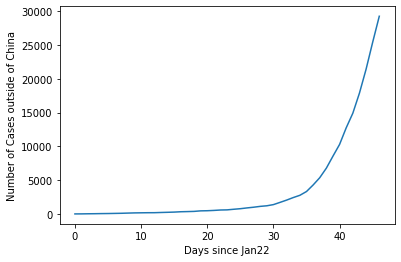

In [0]:
plt.plot(x,y)
plt.xlabel("Days since Jan22")
plt.ylabel("Number of Cases outside of China")

[ 2.19722458  2.7080502   3.40119738  3.68887945  4.02535169  4.18965474
  4.4308168   4.62497281  4.87519732  5.0689042   5.15329159  5.22574667
  5.24702407  5.3981627   5.51342875  5.62762111  5.79909265  5.86929691
  5.94542061  6.13339804  6.17586727  6.26530121  6.37502482  6.41017488
  6.54678541  6.66057515  6.79794041  6.90675478  7.02464903  7.10002717
  7.23345542  7.44716836  7.62803113  7.79523493  7.92443418  8.10862327
  8.3635757   8.58746524  8.82173238  9.05473864  9.23912217  9.45297278
  9.60945201  9.79104647  9.97109947 10.14266192 10.28383996]


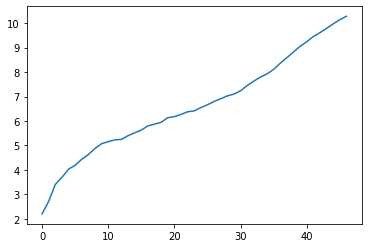

In [0]:
log_y=np.log(y)
print(log_y)
plt.plot(x,log_y)


In [0]:
def cost(X,Y,theta):
  error= np.matmul(X,theta)-Y
  return np.sum(( np.matmul(X.transpose(),error) )**2)/(2*len(Y))
  

In [0]:
def standardize(M):
  mean= np.mean(M)
  std_dev= np.std(M)
  N=[]
  for i in M:
    N.append((i-mean)/std_dev)

  return np.array(N),mean,std_dev

In [0]:
def gradient_desc(X,Y,theta,alpha,iter):
  print("Initial cost: {}".format(cost(X,Y,theta)))
  for i in range(iter):
    error= np.matmul(X,theta)-Y
    grad= ( np.matmul(X.transpose(),error) )/len(Y)
    theta-= alpha*grad

    if(i>=iter-5):
      print(cost(X,Y,theta), grad)
  return theta


In [0]:
ones=np.ones(len(x))
std_x,mean,std_dev= standardize(x)
X=np.stack([ones, std_x], axis=1)
Y=np.transpose(log_y)
print(X.shape)
print(Y.shape)

(47, 2)
(47,)


In [0]:
theta=np.array([0.0,0.0])
theta=gradient_desc(X,Y,theta,1,2)
print(theta)

Initial cost: 1120.2008738732982
1.0934036998313508e-29 [-6.61362737 -1.98193221]
2.809399084833806e-30 [ 5.95268515e-16 -3.33066907e-16]
[6.61362737 1.98193221]


In [0]:
def predict(day,theta):
  return np.dot([1,(day-mean)/std_dev],theta)

print(theta)
predict(20,theta)

[6.61362737 1.98193221]


6.175297429114708

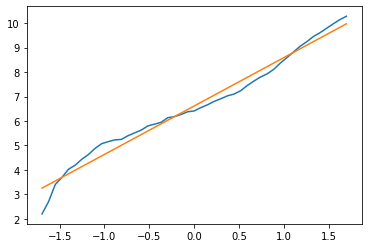

In [0]:
plt.plot(X[:,1],Y)
pred=[]
for i in x:
  pred.append(predict(i,theta))
plt.plot(X[:,1],pred)

In [0]:
def true_predict(day,theta):
  return math.exp(predict(day,theta))

true_predict(46,theta)

21464.526740863348

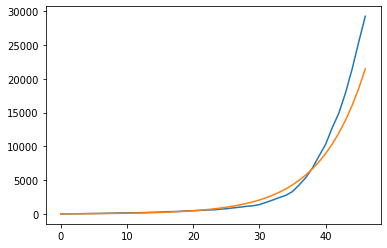

In [0]:
theta = [6.61362737,1.98193221]
plt.plot(x,y)
pred=[]
for i in x:
  pred.append(true_predict(i,theta))
plt.plot(x,pred)

In [0]:
def NormalEq(X,Y):
  square=np.matmul(X.transpose(),X)
  print(square)
  return np.matmul(np.linalg.inv(square), (np.matmul(X.transpose(),Y)) )

NormalEq(X,Y)

[[ 4.70000000e+01 -2.66453526e-15]
 [-2.66453526e-15  4.70000000e+01]]


array([6.61362737, 1.98193221])

<h1>༼ つ ◕_◕ ༽つ Graph. Why u liek dis</h1>


[9.0, 10.709999999999999, 12.7449, 15.166431, 18.048052889999997, 21.477182939099993, 25.557847697528995, 30.4138387600595, 36.19246812447081, 43.06903706812026, 51.2521541110631, 60.99006339216509, 72.57817543667645, 86.36802876964497, 102.77795423587752, 122.30576554069424, 145.54386099342614, 173.19719458217708, 206.10466155279073, 245.26454724782093, 291.86481122490693, 347.3191253576392, 413.30975917559067, 491.83861341895283, 585.2879499685539, 696.4926604625791, 828.8262659504691, 986.3032564810582, 1173.700875212459, 1396.7040415028264, 1662.0778093883632, 1977.8725931721522, 2353.668385874861, 2800.8653791910842, 3333.0298012373905, 3966.3054634724945, 4719.903501532268, 5616.685166823399, 6683.8553485198445, 7953.787864738614, 9465.00755903895, 11263.35899525635, 13403.397204355057, 15950.042673182516, 18980.550781087193, 22586.85542949376, 26878.357961097576]


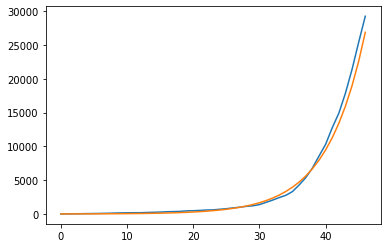

In [0]:
plt.plot(x,y)
pred=[]
for i in x:
  pred.append(9*(1.19**i))
print(pred)
plt.plot(x,pred)

In [0]:
ones=np.ones(len(x))
X=np.stack([ones, x], axis=1)
Y=np.transpose(log_y)
print(X[[1,2,3],:])
print(math.log(1.19))
print(math.log(9))

[[1. 1.]
 [1. 2.]
 [1. 3.]]
0.17395330712343798
2.1972245773362196


In [0]:
theta= np.array([2.1972245773362196,0.17395330712343798])
print("Cost of \'answer\': {}".format(cost(X,Y,theta)))
gradient_desc(X,Y,theta,0.001,100)

Cost of 'answer': 465.82340931303963
Initial cost: 465.82340931303963
1.6581817485914052 [-0.26556333  0.00856966]
1.6573269130146548 [-0.26549487  0.00856745]
1.6564725181277518 [-0.26542642  0.00856524]
1.6556185637035106 [-0.265358    0.00856303]
1.6547650495148623 [-0.26528959  0.00856082]


array([2.22429584, 0.17930914])